<a href="https://colab.research.google.com/github/cryssoga/DSWP/blob/master/Li%C3%A7%C3%A3o/CHURN_Modelo4_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url_train = 'https://raw.githubusercontent.com/cryssoga/DSWP/master/Li%C3%A7%C3%A3o/train.csv'
url_test = 'https://raw.githubusercontent.com/cryssoga/DSWP/master/Li%C3%A7%C3%A3o/test.csv'
url_sample_submission = 'https://raw.githubusercontent.com/cryssoga/DSWP/master/Li%C3%A7%C3%A3o/sample_submission.csv'

# Lendo/carregando os dataframes:

df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)
df_sample_submission = pd.read_csv(url_sample_submission)

In [58]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                5634 non-null   int64  
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5416 non-null   object 
 5   tenure            5173 non-null   float64
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [ ]:
df_train.isna().sum()

In [42]:
df_train.columns

Index(['id', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [148]:
df_test.columns

Index(['id', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [160]:
col = (['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'])

In [ ]:
# value_counts das colunas em col:

for i in col:
  print(df_train[i].value_counts())
  print(df_test[i].value_counts())

In [161]:
# Nas variáveis em col, substituir 'No internet service' por 'No'

col = (['MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies'])
for i in col:
  df_train[i].replace(['No internet service'],['No'], inplace=True)
  df_test[i].replace(['No internet service'],['No'], inplace=True)

In [131]:
for i in col:
  print(df_train[i].value_counts())
  print(df_test[i].value_counts())

No                  2692
Yes                 2390
No phone service     552
Name: MultipleLines, dtype: int64
Fiber optic    2451
DSL            1959
No             1224
Name: InternetService, dtype: int64
No     3987
Yes    1647
Name: OnlineSecurity, dtype: int64
No     3712
Yes    1922
Name: OnlineBackup, dtype: int64
No     3704
Yes    1930
Name: DeviceProtection, dtype: int64
No     4017
Yes    1617
Name: TechSupport, dtype: int64
No     3464
Yes    2170
Name: StreamingTV, dtype: int64
No     3442
Yes    2192
Name: StreamingMovies, dtype: int64


In [133]:
df_train.isna().sum()

id                    0
gender                0
SeniorCitizen         0
Partner               0
Dependents          218
tenure              461
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod        99
MonthlyCharges        0
TotalCharges          0
Churn                 0
dtype: int64

In [162]:
# Tratando os missing values nas variáveis 'PaymentMethod' (moda=mais frequente), 'Dependents' (moda) e 'tenure' (mediana)
# df_train e df_test

df_train['PaymentMethod'].fillna(df_train.PaymentMethod.mode,inplace=True)
df_train['Dependents'].fillna(df_train.Dependents.mode,inplace=True)
df_train['tenure'].fillna(df_train.tenure.median, inplace=True)

df_test['PaymentMethod'].fillna(df_test.PaymentMethod.mode,inplace=True)
df_test['Dependents'].fillna(df_test.Dependents.mode,inplace=True)
df_test['tenure'].fillna(df_test.tenure.median, inplace=True)


In [163]:
df_train.isna().sum()

id                  0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [164]:
# Tratando variável 'TotalCharges' de 'object' para 'numeric', mas antes tratando os campos ' ':
# df_train e df_test

df_train[df_train['TotalCharges']==' ']
df_train['TotalCharges'] = df_train['TotalCharges'].replace(' ', '0')
df_train['TotalCharges'] = pd.to_numeric(df_train['TotalCharges'])

df_test[df_test['TotalCharges']==' ']
df_test['TotalCharges'] = df_test['TotalCharges'].replace(' ', '0')
df_test['TotalCharges'] = pd.to_numeric(df_test['TotalCharges'])

In [174]:
# Tratando os dataframes: Dividindo df_train em df_X_train e df_y_train:

X_treinamento = df_train.drop('Churn',axis=1)
y_treinamento = df_train['Churn']
X_teste = df_test.copy()
y_teste = df_sample_submission['Churn']

In [175]:
X_treinamento.columns

Index(['id', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [177]:
# Tratando variáveis categóricas:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
    # 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    # 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    # 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    # 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'

X_treinamento['gender_le'] = le.fit_transform(X_treinamento['gender'])
X_treinamento['SeniorCitizen_le'] = le.fit_transform(X_treinamento['SeniorCitizen'])
X_treinamento['Partner_le'] = le.fit_transform(X_treinamento['Partner'])
X_treinamento['Dependents_le'] = le.fit_transform(X_treinamento['Dependents'])
X_treinamento['PhoneService_le'] = le.fit_transform(X_treinamento['PhoneService'])
X_treinamento['MultipleLines_le'] = le.fit_transform(X_treinamento['MultipleLines'])
X_treinamento['InternetService_le'] = le.fit_transform(X_treinamento['InternetService'])
X_treinamento['OnlineSecurity_le'] = le.fit_transform(X_treinamento['OnlineSecurity'])
X_treinamento['OnlineBackup_le'] = le.fit_transform(X_treinamento['OnlineBackup'])
X_treinamento['DeviceProtection_le'] = le.fit_transform(X_treinamento['DeviceProtection'])
X_treinamento['TechSupport_le'] = le.fit_transform(X_treinamento['TechSupport'])
X_treinamento['StreamingTV_le'] = le.fit_transform(X_treinamento['StreamingTV'])
X_treinamento['StreamingMovies_le'] = le.fit_transform(X_treinamento['StreamingMovies'])
X_treinamento['Contract_le'] = le.fit_transform(X_treinamento['Contract'])
X_treinamento['PaperlessBilling_le'] = le.fit_transform(X_treinamento['PaperlessBilling'])
X_treinamento['PaymentMethod_le'] = le.fit_transform(X_treinamento['PaymentMethod'])

X_teste['gender_le'] = le.fit_transform(X_teste['gender'])
X_teste['SeniorCitizen_le'] = le.fit_transform(X_teste['SeniorCitizen'])
X_teste['Partner_le'] = le.fit_transform(X_teste['Partner'])
X_teste['Dependents_le'] = le.fit_transform(X_teste['Dependents'])
X_teste['PhoneService_le'] = le.fit_transform(X_teste['PhoneService'])
X_teste['MultipleLines_le'] = le.fit_transform(X_teste['MultipleLines'])
X_teste['InternetService_le'] = le.fit_transform(X_teste['InternetService'])
X_teste['OnlineSecurity_le'] = le.fit_transform(X_teste['OnlineSecurity'])
X_teste['OnlineBackup_le'] = le.fit_transform(X_teste['OnlineBackup'])
X_teste['DeviceProtection_le'] = le.fit_transform(X_teste['DeviceProtection'])
X_teste['TechSupport_le'] = le.fit_transform(X_teste['TechSupport'])
X_teste['StreamingTV_le'] = le.fit_transform(X_teste['StreamingTV'])
X_teste['StreamingMovies_le'] = le.fit_transform(X_teste['StreamingMovies'])
X_teste['Contract_le'] = le.fit_transform(X_teste['Contract'])
X_teste['PaperlessBilling_le'] = le.fit_transform(X_teste['PaperlessBilling'])
X_teste['PaymentMethod_le'] = le.fit_transform(X_teste['PaymentMethod'])

X_train = X_treinamento.copy()
X_test = X_teste.copy()

X_treinamento = X_treinamento.drop(['id','gender', 'SeniorCitizen', 'Partner', 'Dependents',
                                 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                                 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                                 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],axis=1)

X_teste = X_teste.drop(['id','gender', 'SeniorCitizen', 'Partner', 'Dependents',
                                 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                                 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                                 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],axis=1)
l_colunas = X_treinamento.columns

TypeError: ignored

In [4]:
# Definindo variáveis globais:
i_CV = 10     # número de Cross-Validations (CV)
i_Seed = 20111974

from sklearn.model_selection import cross_val_score     # para CV (Cross-Validation)
from sklearn.model_selection import GridSearchCV        # para GridSearchCV (otimizar os parâmetros dos modelos preditivos)
from time import time                                   # requerida na função gridsearchcv
from sklearn.ensemble import RandomForestClassifier     # para o RandomForestClassifier
from sklearn.metrics import confusion_matrix            # para plotar a confusion matrix
import seaborn as sns

In [5]:
# Função para Cross-Validation:

def funcao_cross_val_score(modelo, X_treinamento, y_treinamento, CV):
    
    #versão com cross_val_score:
    a_scores_CV = cross_val_score(modelo, X_treinamento, y_treinamento, cv = CV)
    print(f'Média das Acurácias calculadas pelo CV....: {100*round(a_scores_CV.mean(),4)}')
    print(f'std médio das Acurácias calculadas pelo CV: {100*round(a_scores_CV.std(),4)}')
    return a_scores_CV  # é um array com os scores a cada iteração do CV


In [6]:
# Função para Confusion Matrix:

def mostra_confusion_matrix(cf, 
                            group_names = None, 
                            categories = 'auto', 
                            count = True, 
                            percent = True, 
                            cbar = True, 
                            xyticks = False, 
                            xyplotlabels = True, 
                            sum_stats = True, 
                            figsize = (8, 8), 
                            cmap = 'Blues'):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
    '''

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False

    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

In [7]:
# função para GridSearchCV:

def GridSearchOptimizer(modelo, ml_Opt, d_Parametros, X_treinamento, y_treinamento, X_teste, y_teste, i_CV, l_colunas):
    ml_GridSearchCV = GridSearchCV(modelo, d_Parametros, cv = i_CV, n_jobs = -1, verbose= 10, scoring = 'accuracy')
    start = time()
    ml_GridSearchCV.fit(X_treinamento, y_treinamento)
    tempo_elapsed = time()-start
    #print(f"\nGridSearchCV levou {tempo_elapsed:.2f} segundos.")

    # Parâmetros que otimizam a classificação:
    print(f'\nParametros otimizados: {ml_GridSearchCV.best_params_}')
    
    if ml_Opt == 'ml_DT2':
        print(f'\nDecisionTreeClassifier *********************************************************************************************************')
        ml_Opt = DecisionTreeClassifier(criterion= ml_GridSearchCV.best_params_['criterion'], 
                                        max_depth= ml_GridSearchCV.best_params_['max_depth'],
                                        max_leaf_nodes= ml_GridSearchCV.best_params_['max_leaf_nodes'],
                                        min_samples_split= ml_GridSearchCV.best_params_['min_samples_leaf'],
                                        min_samples_leaf= ml_GridSearchCV.best_params_['min_samples_split'], 
                                        random_state= i_Seed)
        
    elif ml_Opt == 'ml_RF2':
        print(f'\nRandomForestClassifier *********************************************************************************************************')
        ml_Opt = RandomForestClassifier(bootstrap= ml_GridSearchCV.best_params_['bootstrap'], 
                                        max_depth= ml_GridSearchCV.best_params_['max_depth'],
                                        max_features= ml_GridSearchCV.best_params_['max_features'],
                                        min_samples_leaf= ml_GridSearchCV.best_params_['min_samples_leaf'],
                                        min_samples_split= ml_GridSearchCV.best_params_['min_samples_split'],
                                        n_estimators= ml_GridSearchCV.best_params_['n_estimators'],
                                        random_state= i_Seed)
        
    elif ml_Opt == 'ml_AB2':
        print(f'\nAdaBoostClassifier *********************************************************************************************************')
        ml_Opt = AdaBoostClassifier(algorithm='SAMME.R', 
                                    base_estimator=RandomForestClassifier(bootstrap = False, 
                                                                          max_depth = 10, 
                                                                          max_features = 'auto', 
                                                                          min_samples_leaf = 1, 
                                                                          min_samples_split = 2, 
                                                                          n_estimators = 400), 
                                    learning_rate = ml_GridSearchCV.best_params_['learning_rate'], 
                                    n_estimators = ml_GridSearchCV.best_params_['n_estimators'], 
                                    random_state = i_Seed)
        
    elif ml_Opt == 'ml_GB2':
        print(f'\nGradientBoostingClassifier *********************************************************************************************************')
        ml_Opt = GradientBoostingClassifier(learning_rate = ml_GridSearchCV.best_params_['learning_rate'], 
                                            n_estimators = ml_GridSearchCV.best_params_['n_estimators'], 
                                            max_depth = ml_GridSearchCV.best_params_['max_depth'], 
                                            min_samples_split = ml_GridSearchCV.best_params_['min_samples_split'], 
                                            min_samples_leaf = ml_GridSearchCV.best_params_['min_samples_leaf'], 
                                            max_features = ml_GridSearchCV.best_params_['max_features'])
        
    elif ml_Opt == 'ml_XGB2':
        print(f'\nXGBoostingClassifier *********************************************************************************************************')
        ml_Opt = XGBoostingClassifier(learning_rate= ml_GridSearchCV.best_params_['learning_rate'], 
                                      max_depth= ml_GridSearchCV.best_params_['max_depth'], 
                                      colsample_bytree= ml_GridSearchCV.best_params_['colsample_bytree'], 
                                      subsample= ml_GridSearchCV.best_params_['subsample'], 
                                      gamma= ml_GridSearchCV.best_params_['gamma'], 
                                      min_child_weight= ml_GridSearchCV.best_params_['min_child_weight'])
        
    # Treina novamente usando os parametros otimizados...
    ml_Opt.fit(X_treinamento, y_treinamento)

    # Cross-Validation com 10 folds
    print(f'\n********* CROSS-VALIDATION ***********')
    a_scores_CV = funcao_cross_val_score(ml_Opt, X_treinamento, y_treinamento, i_CV)

    # Faz predições com os parametros otimizados...
    y_pred = ml_Opt.predict(X_teste)
  
    # Importância das COLUNAS
    print(f'\n********* IMPORTÂNCIA DAS COLUNAS ***********')
    df_importancia_variaveis = pd.DataFrame(zip(l_colunas, ml_Opt.feature_importances_), columns= ['coluna', 'importancia'])
    df_importancia_variaveis = df_importancia_variaveis.sort_values(by= ['importancia'], ascending=False)
    print(df_importancia_variaveis)

    # Matriz de Confusão
    print(f'\n********* CONFUSION MATRIX - PARAMETER TUNNING ***********')
    cf_matrix = confusion_matrix(y_teste, y_pred)
    cf_labels = ['True_Negative', 'False_Positive', 'False_Negative', 'True_Positive']
    cf_categories = ['Zero', 'One']
    mostra_confusion_matrix(cf_matrix, group_names = cf_labels, categories = cf_categories)

    return ml_Opt, ml_GridSearchCV.best_params_


In [8]:
# Função para Decision Tree:

from sklearn.tree import DecisionTreeClassifier # Library para Decision Tree (Classificação)

ml_DT = DecisionTreeClassifier(criterion = 'gini', 
                               splitter = 'best', 
                               max_depth = None, 
                               min_samples_split = 2, 
                               min_samples_leaf = 1, 
                               min_weight_fraction_leaf = 0.0, 
                               max_features = None, 
                               random_state = i_Seed, 
                               max_leaf_nodes = None, 
                               min_impurity_decrease = 0.0, 
                               min_impurity_split = None, 
                               class_weight = None, 
                               presort = False)



## MODELO 3: RANDOM FOREST, CV e GridSearchRF (X_treinamento, X_teste)

Média das Acurácias calculadas pelo CV....: 79.86
std médio das Acurácias calculadas pelo CV: 1.97
Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   52.3s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  2


Parametros otimizados: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}

RandomForestClassifier *********************************************************************************************************

********* CROSS-VALIDATION ***********
Média das Acurácias calculadas pelo CV....: 80.58
std médio das Acurácias calculadas pelo CV: 1.6099999999999999

********* IMPORTÂNCIA DAS COLUNAS ***********
                 coluna  importancia
2          TotalCharges     0.160752
0                tenure     0.148190
1        MonthlyCharges     0.144845
16          Contract_le     0.143786
10    OnlineSecurity_le     0.068424
13       TechSupport_le     0.064404
9    InternetService_le     0.048603
18     PaymentMethod_le     0.040039
11      OnlineBackup_le     0.028803
17  PaperlessBilling_le     0.023075
12  DeviceProtection_le     0.021446
3             gender_le     0.018275
8      MultipleLines_le     0.0168

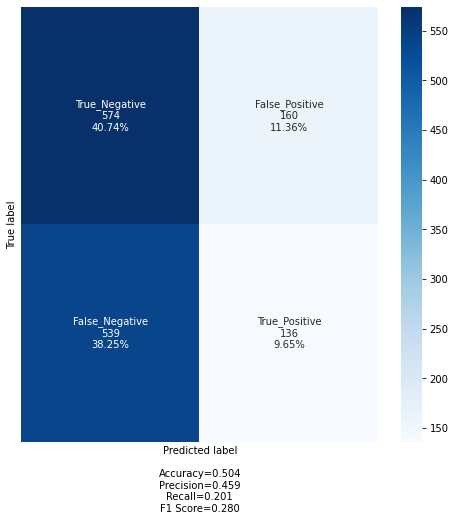

In [9]:
# RandomForestClassifier

# Instancia...
ml_RF= RandomForestClassifier(n_estimators=200, min_samples_split= 2, max_features="auto",random_state = i_Seed)

# Treina...
ml_RF.fit(X_treinamento, y_treinamento)

a_scores_CV = funcao_cross_val_score(ml_RF, X_treinamento, y_treinamento, i_CV)

# Faz predições...
y_pred = ml_RF.predict(X_teste)

# Dicionário de parâmetros para o parameter tunning.
d_hiperparametros_RF= {'bootstrap': [True, False],
                  'max_depth': [10,None],#[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                  'max_features': ['auto', 'sqrt'],
                  'min_samples_leaf': [1, 2, 4],
                  'min_samples_split': [2,5], #[2, 5, 10],
                  'n_estimators': [200,400]}#[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

ml_RF2, best_params = GridSearchOptimizer(ml_RF, 'ml_RF2', d_hiperparametros_RF, X_treinamento, y_treinamento, X_teste, y_teste, i_CV, l_colunas)

In [10]:
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [13]:
unique_elements, counts_elements = np.unique(y_pred, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[   0    1]
 [1128  281]]


In [11]:
#y_pred = ml_RF.predict(X_teste)

#y_teste_submit = ml_RF.predict(df_teste_submit)
df_submit = pd.DataFrame(zip(df_test['id'],y_pred), columns = ['id','Churn'])
df_submit.to_csv('submit.csv',index = False)

In [12]:
df_submit

,id,Churn
0,5027,0
1,1733,0
2,5384,0
3,6554,0
4,364,0
...,...,...
1404,4897,0
1405,6940,0
1406,804,0
1407,1143,1
